<a href="https://colab.research.google.com/github/theheking/intro-to-python/blob/gh-pages/7_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Visualisation with Seaborn and Matlib pyplot

Python has a number of powerful plotting libraries to choose from. One of the oldest and most popular is matplotlib

The Grammar of Graphics
1. Statistical graphics is a mapping from data to aesthetic attributes (colour, shape, size) of geometric objects (points, lines, bars)

2. Faceting can be used to generate the same plot for different subsets of the dataset


#Great resources include:
- https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

- https://seaborn.pydata.org/examples/index.html

- https://www.python-graph-gallery.com/


In [ ]:
!pip install pandas matplotlib seaborn


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request

Basic steps of creating plots with Seaborn are:
1. Prepare some data
2. Control figure aesthetics 
3. Plot with seaborn
4. Further customize your plot

In [ ]:
# create the dataframe
# initalise random state
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


In [ ]:
# plot the data with matplotlib defaults plt.plot(x, y) and using plt.legend('ABCDEF', ncol=2, loc='upper left');


In [ ]:
#we will recreate that same plot from matplot.pyplot with seaborn!
#the sns plot
sns.set()
dataframe=pd.DataFrame(y, index=x)

# same plotting code as above! 
sns.lineplot(dataframe)

#set the legend
plt.legend('ABCDEF', ncol=2, loc='upper left');


# Forming a Seaborn plot using our data
It provides high-level commands to create a variety of plot types.

Need to define
- data -> dataframe 
- x --> string with the name of column
- y --> string with the name of column
- hue 
- size


In [ ]:
url = 'https://raw.githubusercontent.com/theheking/intro-to-python/gh-pages/docs/patient_data.csv'
#retrieve the file

urllib.request.urlretrieve(url, 'patient_data.csv')
patient_df=pd.read_csv('patient_data.csv')

In [ ]:
#control figure aesthetics use set_style with white, darkgrid, whitegrid, dark, ticks

Another great extension for imporvement of aesthetics are: https://seaborn.pydata.org/tutorial/aesthetics.html

In [ ]:
##plot a scatterplot of weight and day for patient_df assign to variable g

##add in other infomation such as title, axis labels, limits


In [ ]:
# lets add some infomation about species and year using the hue and size  sns.scatterplot(data=patient_df, x="weight", y="day", size="sex", hue="illness")
#but as you can see this is a pretty ugly and uninformative plot

#Customising the legend

In [ ]:
#remove the legend using the legend flag


You can also use the bbox_to_anchor() argument to place the legend outside of the plot. For example, you can use the following syntax to place the legend in the top right corner outside of the plot:


In [ ]:
# use legend function with flag bbox_to_anchor, ncol, and loc

# Change the colours using the Palette Function
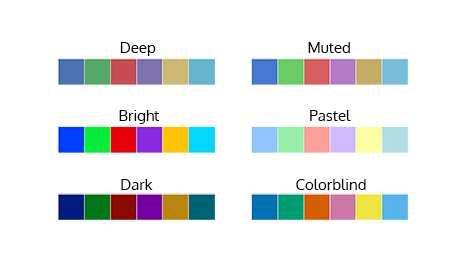

In [ ]:
##if you want to check them out
# Save a palette to a variable: palette = sns.color_palette("bright")

# Use palplot and pass in the variable: sns.palplot(palette)


In [ ]:
##change the colours using palette arguement


# Forming a count bar plot
This is when we need to start asking questions about our data...

Is there a change in the number of patients we have at each site?


In [ ]:
#use countplot to visualise the number of patients with siteid, use xticks with rotation=90

In [ ]:
#do the same visualisation but using matplot.pyplot
#patient_df[["site_id", "illness"]].value_counts().unstack().plot(kind='bar', stacked=True) move the legend to outside

In [ ]:
#move the legend to the outside 


In [ ]:
#use countplot to visualise the different sexes with the number of patients with siteid, use xticks with rotation=90


# Challenges
1) Produce a plot comparing the number of observations for every sex at each site. 




2) Use a boxplot to visualise the weight across sex. 

- HINT: There's a list of plot types available from the cheatsheet



# Violin Plots are an alternative to boxplots...

- Boxplot has four main features about a variable: center, spread, asymmetry, and outlier

- Violin plot shows density too 

Here we will show extra things to develop your plot
- orientation
- increasing size of the figure
- split
- save an image for later

In [ ]:
#set the figure size 
sns.set(rc={'figure.figsize':(20.7,8.27)})

# make a violinplot of illness against weight 
# test out split=True, hue="sex", 






# Save an image 
When saving a figure think about


In [ ]:
#save the same dataframe
g = sns.violinplot(data=patient_df, x="illness", y="weight", split=True, orient="v", hue="sex")
#create a string and save the image
location_string="nameofigure.jpeg"
plt.savefig(location_string, transparent =False)


# Challenge

- Can you log2 transform weight and plot a "normalised" boxplot ? Hint: use np.log2() function and name new column weight_log.

- Does a log2 transform make this data visualisation better ?




Let's see whether there is any correlation any of the variables! We'll do this using a pairgrid, which draws plots of all these correlations:

In [ ]:
g = sns.PairGrid(patient_df, vars=['day','site_id','weight'],
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();
# NB. our data is not that useful